# 10. Logistic Regression, KNN, SVM; undersampling the majority class

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# ML packages
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix #old functions 

In [3]:
df = pd.read_csv("data/data10_FraudDetection_creditcard.csv")   #Class 1: Fraudulant Class 0: Non-Fraudulant
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(99999, 31)

In [5]:
#Check the balance of the data--> Very unbalanced
df.Class.value_counts()

Class
0    99776
1      223
Name: count, dtype: int64

In [6]:
#Split samples
y=df['Class'] #our outcome variable
x=df.loc[:,df.columns != 'Class']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state = 101) #randomstate is set seed
y_test.sample(4)  #random samples like head() or tail()

15801    0
49812    0
80657    0
8117     0
Name: Class, dtype: int64

In [7]:
#Logistic Regression
lr = LogisticRegression(penalty='l2', C=100, max_iter=5000)  #C is the strength
lr.fit(x_train, y_train)

LogisticRegression(C=100, max_iter=5000)

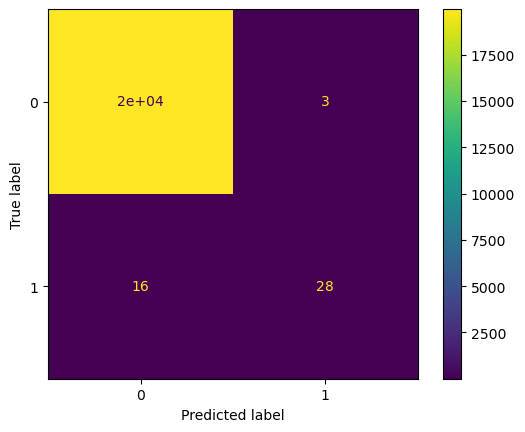

In [8]:
ConfusionMatrixDisplay.from_estimator(lr, x_test, y_test)

In [9]:
# Accuracy score, Precision, and Recall
y_pred = lr.predict(x_test)

lr_score = accuracy_score(y_test, y_pred)
print(f'LR Accuracy score = {lr_score}')   #accuracy score is nothing in severe unbalanced data
 
print('Classification Report:')
print(classification_report(y_test, y_pred))

LR Accuracy score = 0.99905
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19956
           1       0.90      0.64      0.75        44

    accuracy                           1.00     20000
   macro avg       0.95      0.82      0.87     20000
weighted avg       1.00      1.00      1.00     20000



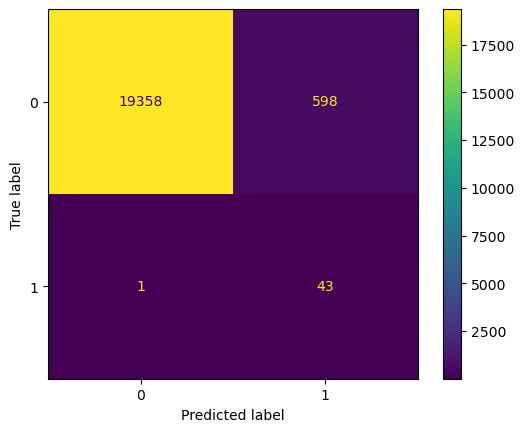

In [10]:
lr = LogisticRegression(penalty='l2', C=100, max_iter=5000, class_weight='balanced')  #undersampling the majority set of data
lr.fit(x_train, y_train)
ConfusionMatrixDisplay.from_estimator(lr, x_test, y_test)

In [11]:
pip install --upgrade numpy scikit_learn threadpoolctl

  Obtaining dependency information for scikit_learn from https://files.pythonhosted.org/packages/7b/0e/25d6b5678ed3c7e12bc94d047d0e9492e89cc78b7ea0034ac0f1cf2ff304/scikit_learn-1.4.1.post1-cp311-cp311-win_amd64.whl.metadata
  Using cached scikit_learn-1.4.1.post1-cp311-cp311-win_amd64.whl.metadata (11 kB)
Using cached scikit_learn-1.4.1.post1-cp311-cp311-win_amd64.whl (10.6 MB)
  Attempting uninstall: scikit_learn
    Found existing installation: scikit-learn 1.3.0
    Uninstalling scikit-learn-1.3.0:
      Successfully uninstalled scikit-learn-1.3.0
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] 액세스가 거부되었습니다: 'C:\\Users\\soyyo\\anaconda3\\Lib\\site-packages\\~klearn\\decomposition\\_cdnmf_fast.cp311-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [14]:
# KNN model
knc = KNeighborsClassifier(n_neighbors=50)
knc.fit(x_train, y_train)
ConfusionMatrixDisplay.from_estimator(knc, x_test, y_test)

AttributeError: 'Flags' object has no attribute 'c_contiguous'

In [13]:
y_pred = knc.predict(x_test)

score = accuracy_score(y_test, y_pred)
print(f'Accuracy score = {score}')   #accuracy score is nothing in severe unbalanced data
 
print('Classification Report:')
print(classification_report(y_test, y_pred))

AttributeError: 'Flags' object has no attribute 'c_contiguous'

In [ ]:
#SVC
svc = SVC(kernel='linear', C=10, random_state=101)
svc.fit(x_train, y_train)
ConfusionMatrixDisplay.from_estimator(svc, x_test,y_test)

In [ ]:
pip install -U imbalanced-learn

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
rus = RandomUnderSampler(random_state=101)

In [ ]:
x_res, y_res = rus.fit_resample(x,y)   #the resampled x and y

In [ ]:
y_res.value_counts()   # now well balanced

In [ ]:
#Split samples
x_train, x_test, y_train, y_test = train_test_split(x_res,y_res,test_size=0.2, random_state = 101) #randomstate is set seed
y_test.sample(4)  #random samples like head() or tail()

In [ ]:
lr = LogisticRegression(penalty='l2', C=100, max_iter=20000)  #C is the strength
lr.fit(x_train, y_train)
ConfusionMatrixDisplay.from_estimator(lr,x_test,y_test)